# Load Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from jcopml.plot import plot_missing_value

# Read Dataset : ingredient.csv

In [2]:
df = pd.read_csv('ingredient.csv')
df.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


# Quick Exploratory Data Analysis (EDA)

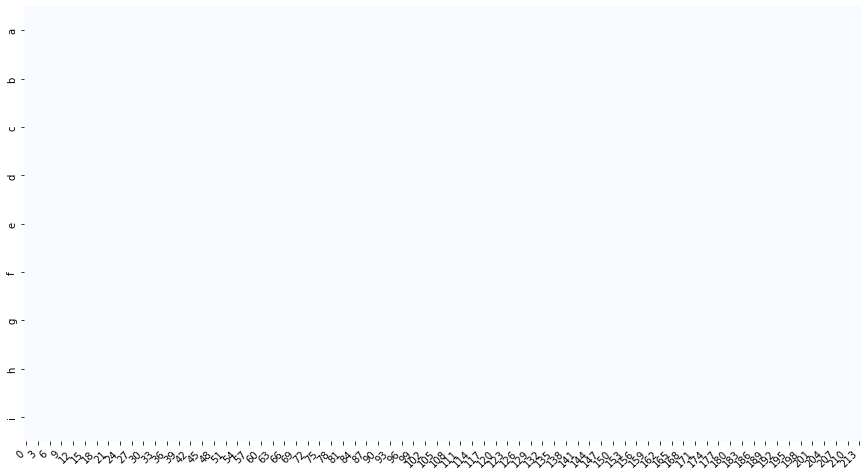

In [3]:
plot_missing_value(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [5]:
df.infer_objects()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


# Sub a - b ( Descriptive analysis and Graphical)

In [6]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


## Correlation

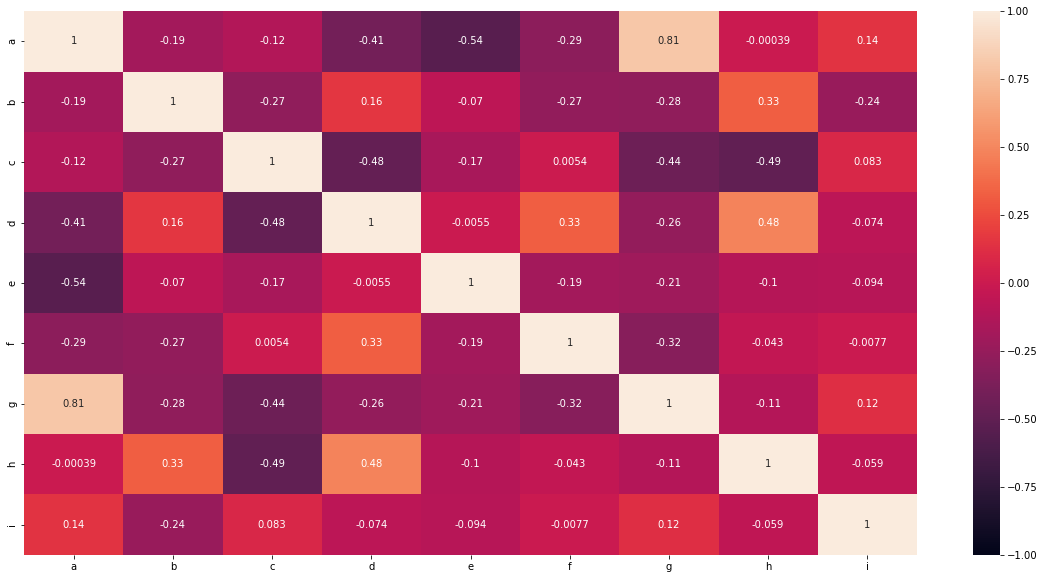

In [7]:
# data = a,b,c,d,e,f,g,h,i

# df = pd.DataFrame(df.corr,columns=['a','b','c','d','e','f','g','h','i'])

plt.figure(figsize=(20,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix,vmin=-1, vmax=1, annot=True)
plt.show()

# ANOVA Test

## Separate Variables ( a - i )

In [8]:
a,b,c,d,e,f,g,h,i = df['a'], df['b'], df['c'], df['d'], df['e'], df['f'], df['g'], df['h'], df['i']

<module 'matplotlib.pyplot' from 'C:\\Users\\aidil\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

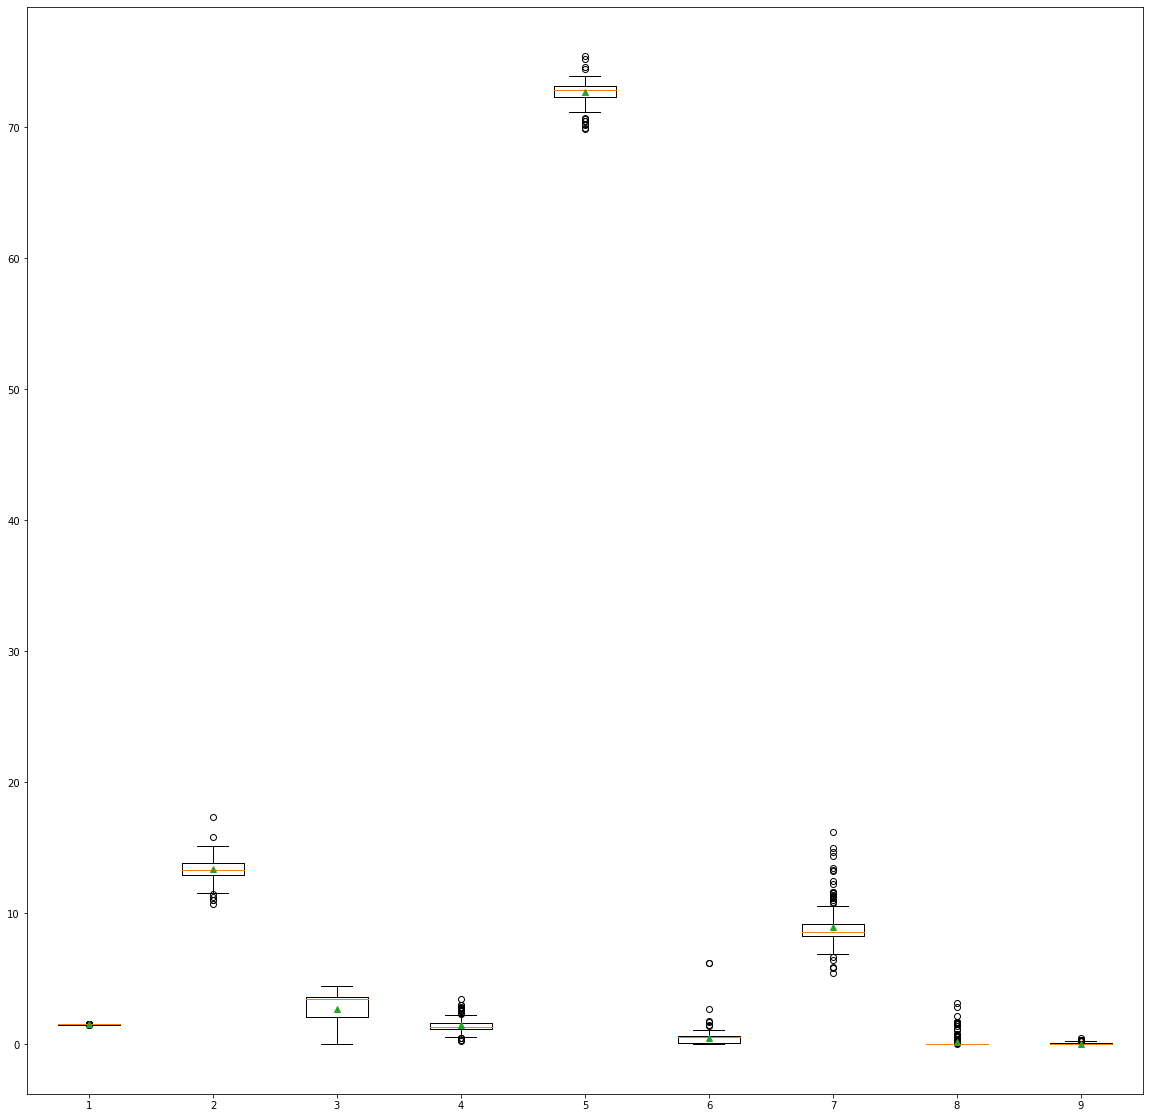

In [9]:
plt.figure(figsize=(20,20))
plt.boxplot([a,b,c,d,e,f,g,h,i], showmeans = True)
plt

In [10]:
# Testing Use Anova With Function stats

from scipy import stats

In [11]:
# check p value

stats.f_oneway(a,c,d,f,h,i)

F_onewayResult(statistic=435.12138831364956, pvalue=7.984986739047948e-273)

In [12]:
# Create New Column in table to category

df_new = pd.melt(df, var_name = 'kelas', value_name = 'value')
df_new

,kelas,value
0,a,1.51735
1,a,1.53125
2,a,1.52300
3,a,1.51768
4,a,1.51813
...,...,...
1921,i,0.16000
1922,i,0.32000
1923,i,0.00000
1924,i,0.22000


In [13]:
# perform avova tests with the statsmodel library (following R style)

from statsmodels.formula.api import ols

In [14]:
result = ols(formula = 'value ~ kelas', data = df_new).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.683e+05
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:29:56   Log-Likelihood:                -2385.5
No. Observations:                1926   AIC:                             4789.
Df Residuals:                    1917   BIC:                             4839.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5184      0.057     26.540      0.000       1.406       1.631
kelas[T.b]    11.8895      0.081    146.949      0.000      11.731      12.048
kelas[T.c]     1.1662      0.081     14.413      0.000       1.007       1.325
kelas[T.d]    -0.0735      0.081     -0.908      0.364      -0.232       0.085
kelas[T.e]    71.1326      0.081    879.170      0.000      70.974      71.291
kelas[T.f]    -1.0213      0.081    -12.623      0.000      -1.180      -0.863
kelas[T.g]     7.4386      0.081     91.938      0.000       7.280       7.597
kelas[T.h]    -1.3433      0.081    -16.603      0.000      -1.502      -1.185
kelas[T.i]    -1.4614      0.081    -18.062      0.000      -1.620      -1.303
==============================================================================
Omnibus:                      573.980   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11835.880
Skew:                           0.885   Prob(JB):                         0.00
Kurtosis:                      15.015   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from statsmodels.stats.anova import anova_lm
result1 = anova_lm(result)
result1

,df,sum_sq,mean_sq,F,PR(>F)
kelas,8.0,943261.084445,117907.635556,168331.968858,0.0
Residual,1917.0,1342.757047,0.700447,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


## Variable a (Distribution)

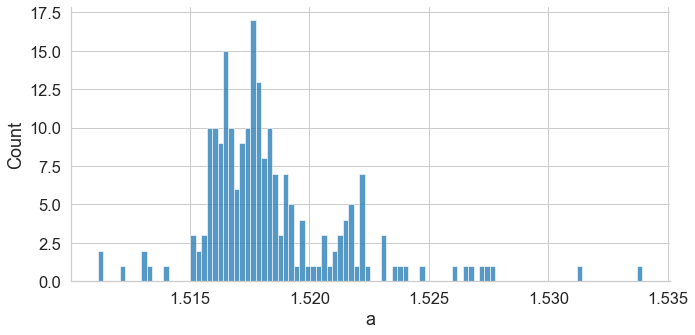

In [17]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="a", kind="hist", bins = 100, aspect = 2)

## Variable b (Distribution)

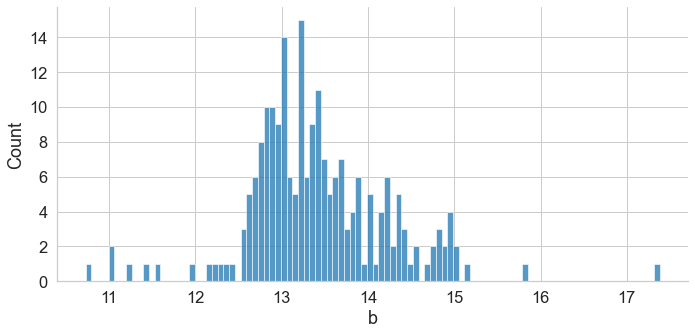

In [18]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="b", kind="hist", bins = 100, aspect = 2)

## Variable c (Distribution) 

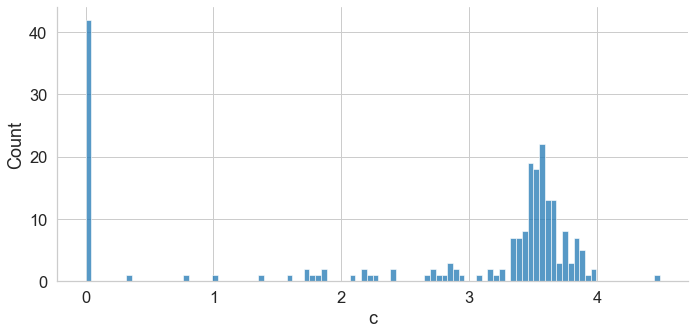

In [19]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="c", kind="hist", bins = 100, aspect = 2)

## Variable d (Distribution)

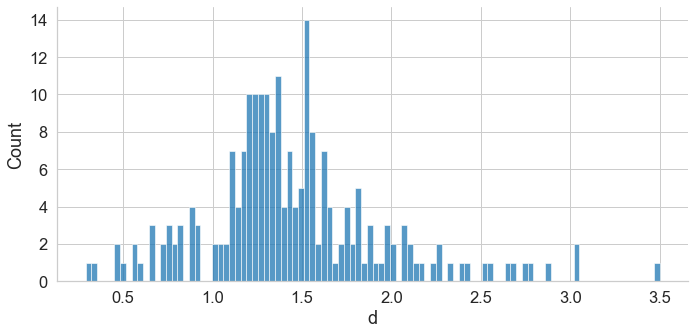

In [20]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="d", kind="hist", bins = 100, aspect = 2)

## Variable e (Distribution)

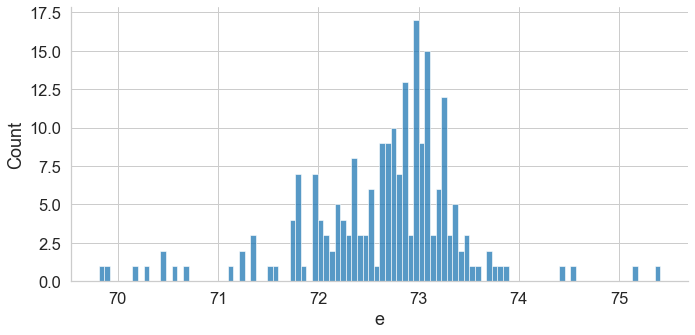

In [21]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="e", kind="hist", bins = 100, aspect = 2)

## Variable f (Distribution)

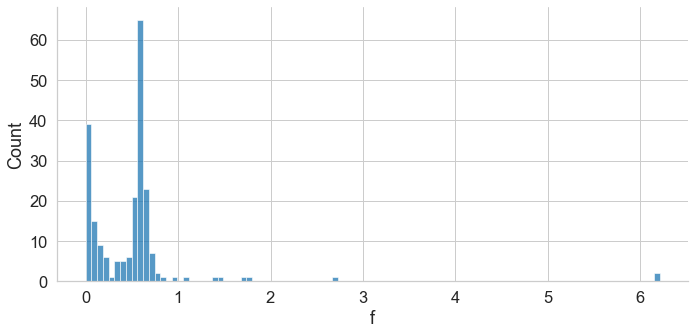

In [22]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="f", kind="hist", bins = 100, aspect = 2)

## Variable g (Distribution)

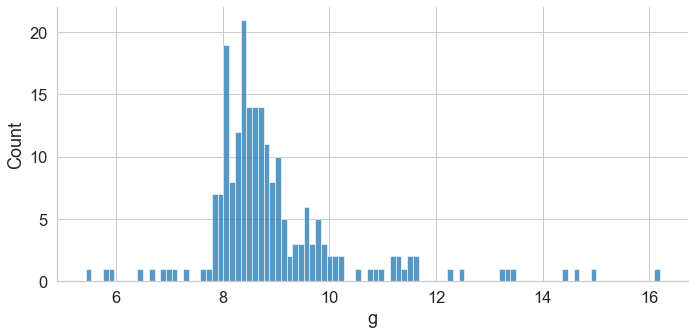

In [23]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="g", kind="hist", bins = 100, aspect = 2)

## Variable h (Distribution) 

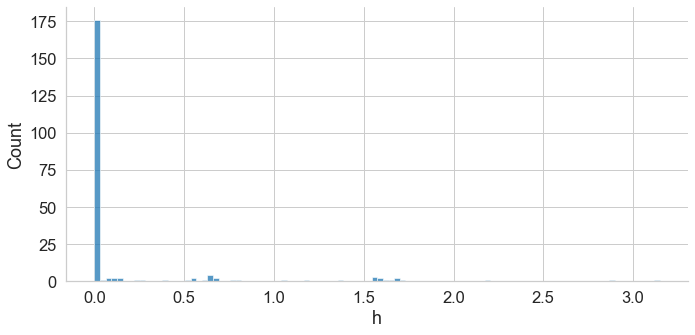

In [24]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="h", kind="hist", bins = 100, aspect = 2)

## Variable i (Distribution)

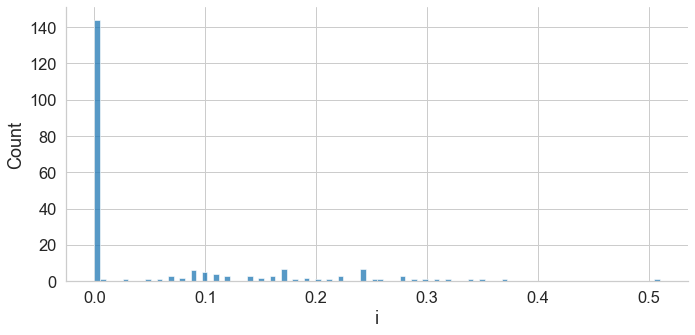

In [25]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1.5)
sns.displot(data=df, x="i", kind="hist", bins = 100, aspect = 2)

# Clustering Test (Unsupervised Learning) 

## Cluster Hierarchy

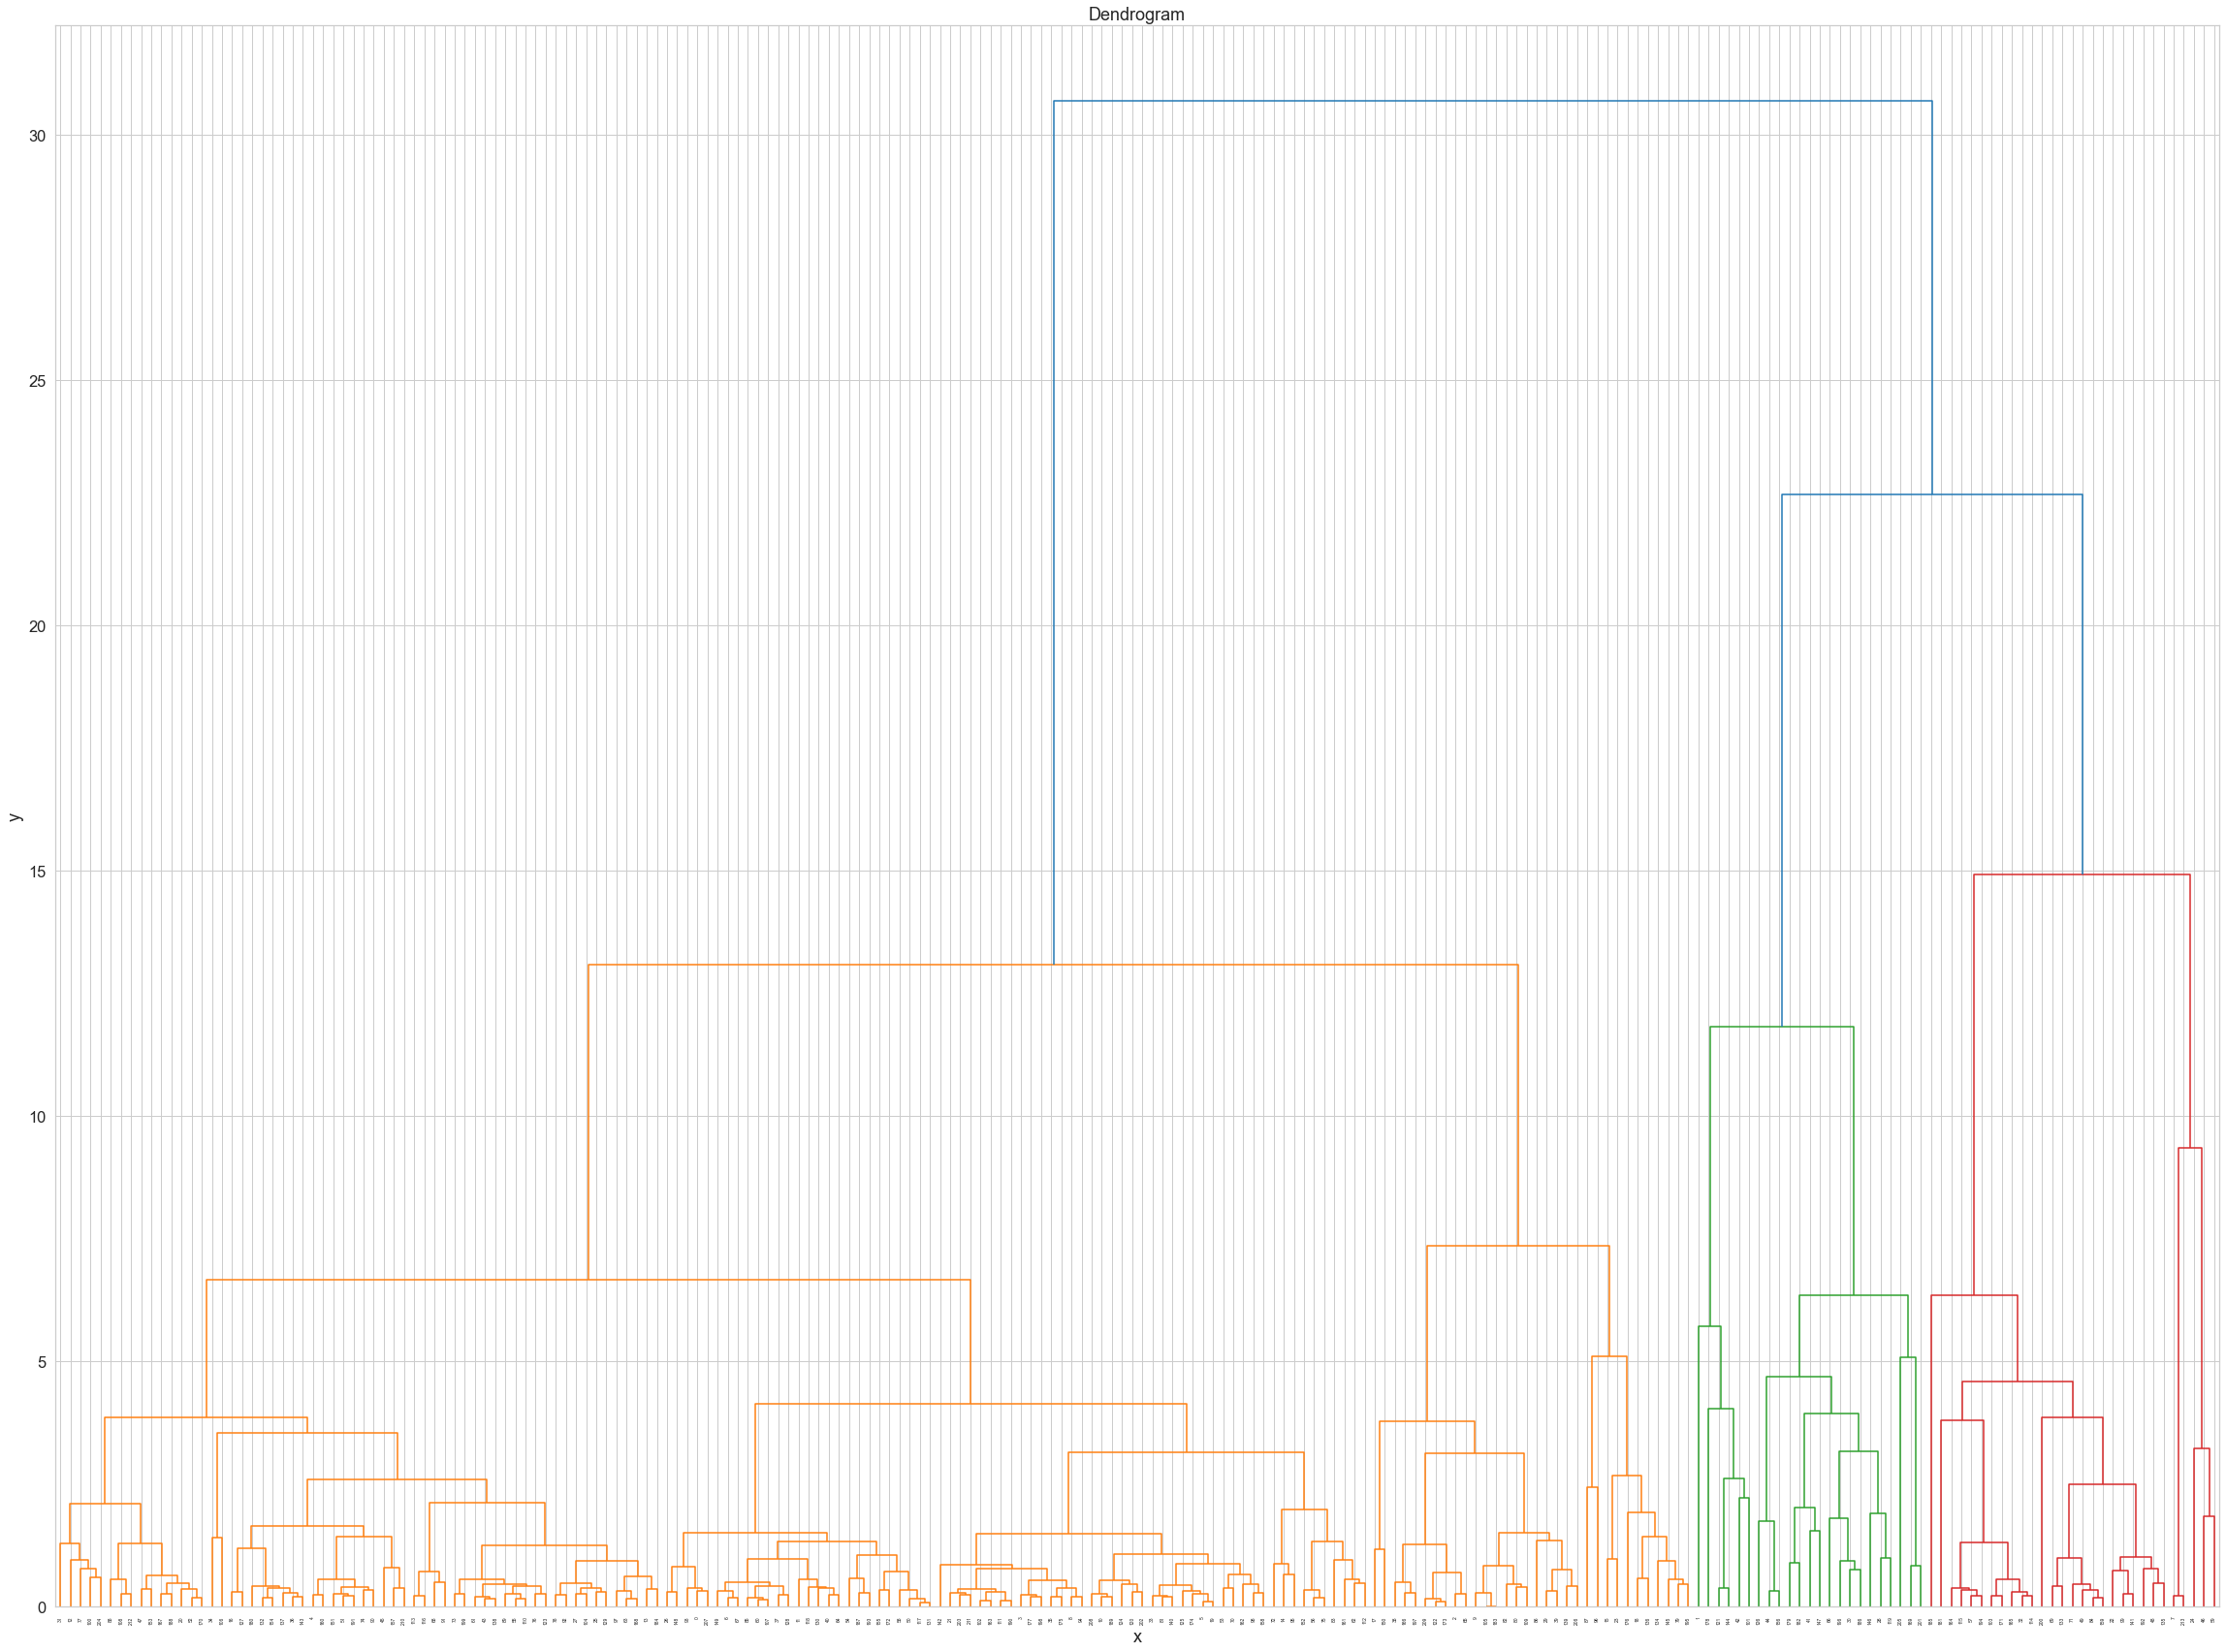

In [26]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(40,30))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## K- Means

[[1.51729718e+00 1.31208065e+01 3.50241935e+00 1.37354839e+00
  7.28180645e+01 5.67741935e-01 8.39629032e+00 5.16129032e-03
  6.54838710e-02]
 [1.52013529e+00 1.31335294e+01 5.72941176e-01 1.48647059e+00
  7.30682353e+01 5.01764706e-01 1.10052941e+01 1.41176471e-02
  6.17647059e-02]
 [1.52143086e+00 1.38965714e+01 3.34314286e+00 1.03257143e+00
  7.17914286e+01 1.86285714e-01 9.55085714e+00 7.85714286e-02
  4.80000000e-02]
 [1.51494333e+00 1.40066667e+01 3.04666667e+00 2.51000000e+00
  7.13166667e+01 1.63333333e+00 5.69666667e+00 1.67333333e+00
  6.93889390e-18]
 [1.51630385e+00 1.46746154e+01 1.65384615e-01 2.12923077e+00
  7.33138462e+01 7.07692308e-02 8.58038462e+00 9.86923077e-01
  1.50000000e-02]
 [1.52826714e+00 1.18671429e+01 0.00000000e+00 1.21857143e+00
  7.16728571e+01 2.51428571e-01 1.43157143e+01 4.50000000e-01
  1.37142857e-01]
 [1.51318500e+00 1.30100000e+01 0.00000000e+00 3.03000000e+00
  7.05900000e+01 6.21000000e+00 6.94500000e+00 0.00000000e+00
  0.00000000e+00]]


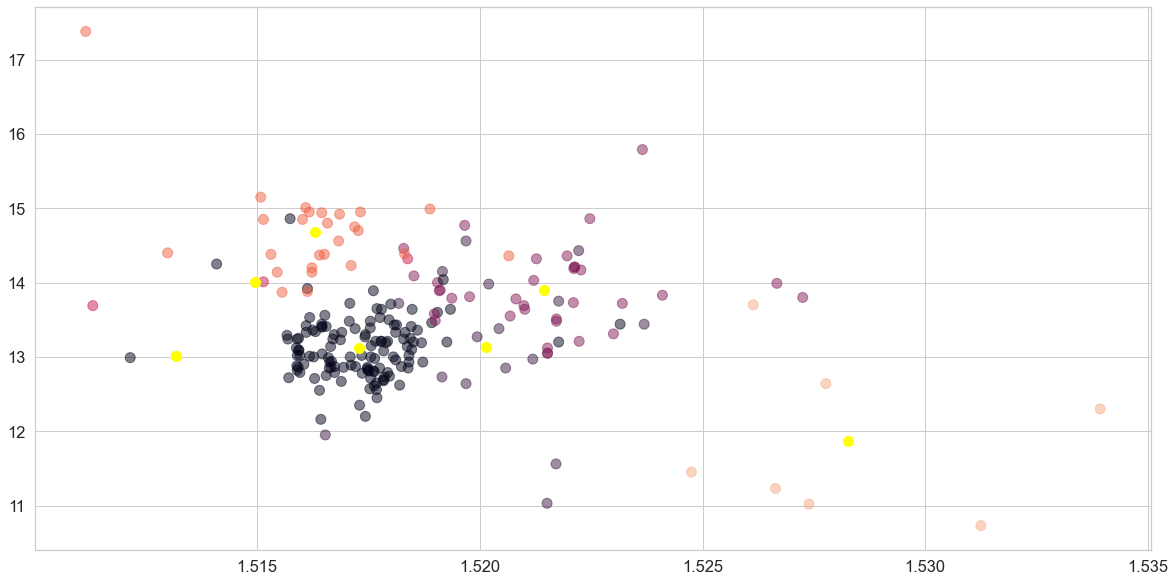

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.figure(figsize=(20, 10))
plt.scatter(df['a'], df['b'], c= kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=100)
plt.show()

In [28]:
print('Terima Kasih \U0001F600')

Terima Kasih 😀
